In [ ]:
#Develop a machine learning model to predict customer response to a marketing campaign and identify potential marketing targets.

## 1. Data Preprocessing

In [ ]:
#Importing and reading CSV file.
import pandas as pd

data = pd.read_csv("bank-full.csv",sep=";")
# sep : instructs the interpreter about the delimiter used in our dataset or, in Layman's terms, how the data items are separated in our CSV file.

In [ ]:
#Examining the struct of Dataset.

data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [ ]:
#Statistical analysis of dataset
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [ ]:
#To display basic info about the dataset (regarding Null count)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
#To examine the basic null values in dataset.

print(data.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


In [ ]:
#Encoding categorical data present in dataset

data = pd.get_dummies(data,drop_first=True)

#drop_first=True : This function is used to convert categorical variables into dummy or indicator variables.

In [ ]:
#Seperating feature and target
X = data.drop("y_yes",axis=1) #axis=1 indicates we are droping column. and holds featues req to train model.
Y = data['y_yes'] # Target variable.

## 2. Exploratory data analysis

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>,
        <Axes: title={'center': 'day'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>,
        <Axes: title={'center': 'pdays'}>],
       [<Axes: title={'center': 'previous'}>, <Axes: >, <Axes: >]],
      dtype=object)

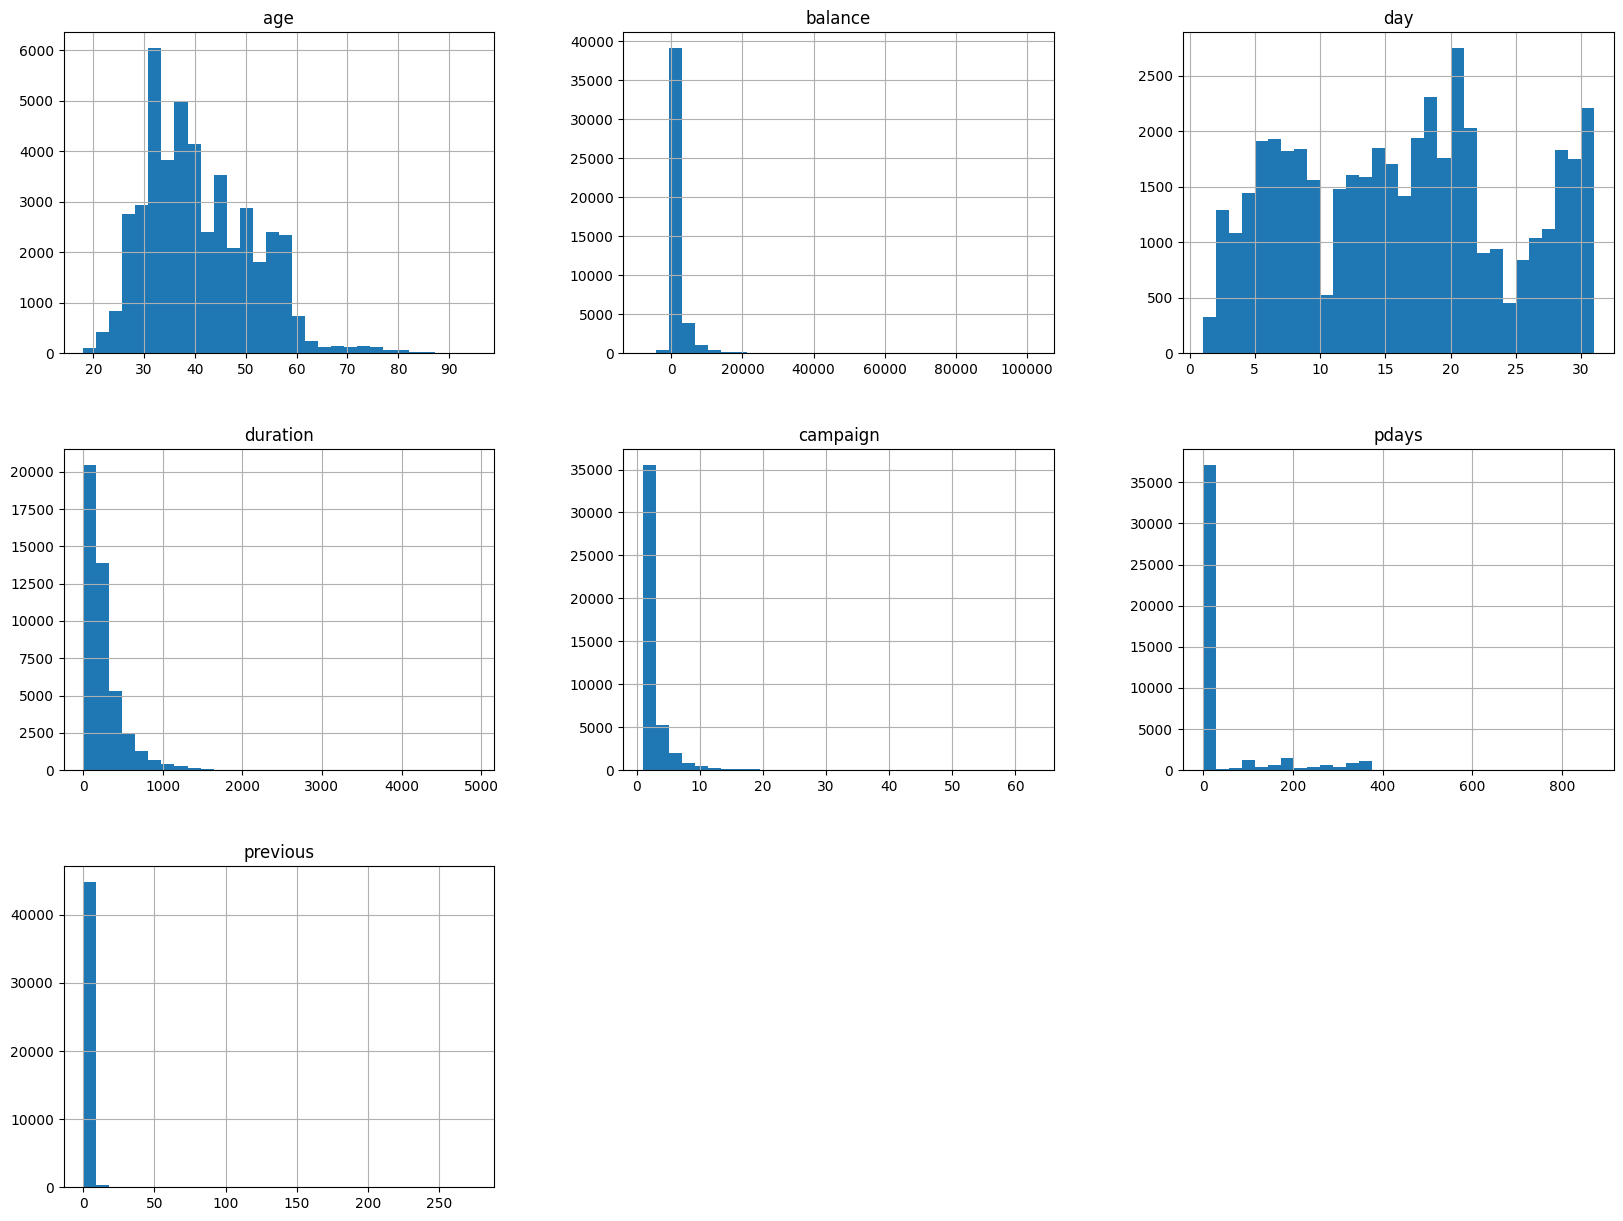

In [ ]:
import seaborn as sns
import matplotlib as plt

#Histogram for numerical data analysis

data.hist(bins=30,figsize=(20,15))

<Axes: >

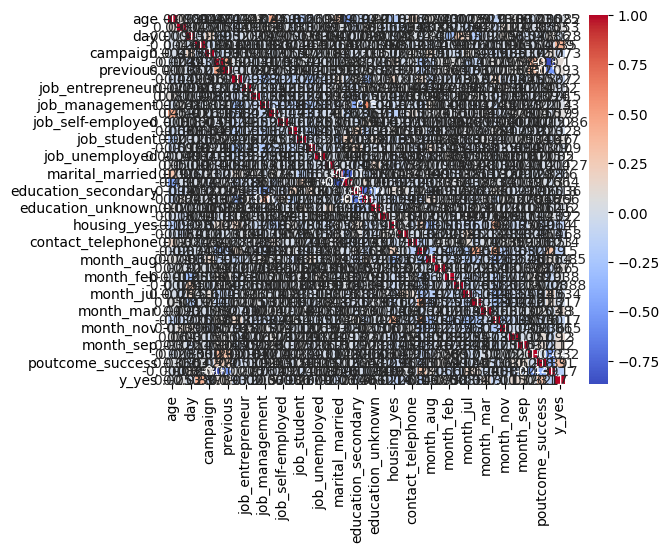

In [ ]:
#Correlation matrix : To determine relation between variables in dataset

cor_mat = data.corr()
sns.heatmap(cor_mat,annot=True,cmap='coolwarm')

## 3. Feature Engineering

In [ ]:
#Feature engineering : it is the process of selecting and transforming variables for featuring model.

data['contact_duration_rate'] = data['duration'] / (data['campaign'] + 1) # +1 is added to avoid division by 0

#Droping individual columns.

data = data.drop(['duration','campaign'],axis=1)

In [ ]:
#Redefining the feature and target variables to the model

X = data.drop(['y_yes'],axis=1)
Y  = data['y_yes']

## 4. Model Selection

In [ ]:
# train_test_split package used to split the corpus data into training set and testing set.
from sklearn.model_selection import train_test_split

# RandomForestClassifier used in supervised learning model and used to solve regression ( numerical target var ) & classification ( catergorical data )
from sklearn.ensemble import RandomForestClassifier

#Logical regression used for prediction in model
from sklearn.linear_model import LogisticRegression

#Importing necesary lib to evaluate the validation metrics to model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

#
from sklearn.preprocessing import StandardScaler

In [ ]:
#Spliting the data into training and testing phase.

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [ ]:
#Standardizing the data.
#performs the fit_transform(X_train) : It subtracts the mean and dividing the standard deviation for each feature in X_train.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Intializing the Models

Log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()

In [ ]:
#Training models

Log_reg.fit(X_train,Y_train)
rf_clf.fit(X_train,Y_train)

RandomForestClassifier()

In [ ]:
#Making Predictions

log_reg_pred = Log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)

## Evaluation Metrics

In [ ]:
print("Logistic Regression Metrics")

print(f"Accuracy: {accuracy_score(Y_test,log_reg_pred)}")
print(f"Precision: {precision_score(Y_test,log_reg_pred)}")
print(f"Recall: {recall_score(Y_test,log_reg_pred)}")
print(f"f1_score:{f1_score(Y_test,log_reg_pred)}")
print(f"ROC_AUC: {roc_auc_score(Y_test,log_reg_pred)}")

Logistic Regression Metrics
Accuracy: 0.9005860886873825
Precision: 0.6882352941176471
Recall: 0.32172318973418884
f1_score:0.438475952529669
ROC_AUC: 0.6508641099576377


In [ ]:
print("\nRandom Forest Classifier")

print(f"Accuracy: {accuracy_score(Y_test,rf_clf_pred)}")
print(f"Precision: {precision_score(Y_test,rf_clf_pred)}")
print(f"Recall: {recall_score(Y_test,rf_clf_pred)}")
print(f"f1_score:{f1_score(Y_test,rf_clf_pred)}")
print(f"Roc_AUC: {roc_auc_score(Y_test,log_reg_pred)}")



Random Forest Classifier
Accuracy: 0.9031294924250802
Precision: 0.6818950930626058
Recall: 0.3693858845096242
f1_score:0.47919143876337683
Roc_AUC: 0.6508641099576377


## Model Interpretation

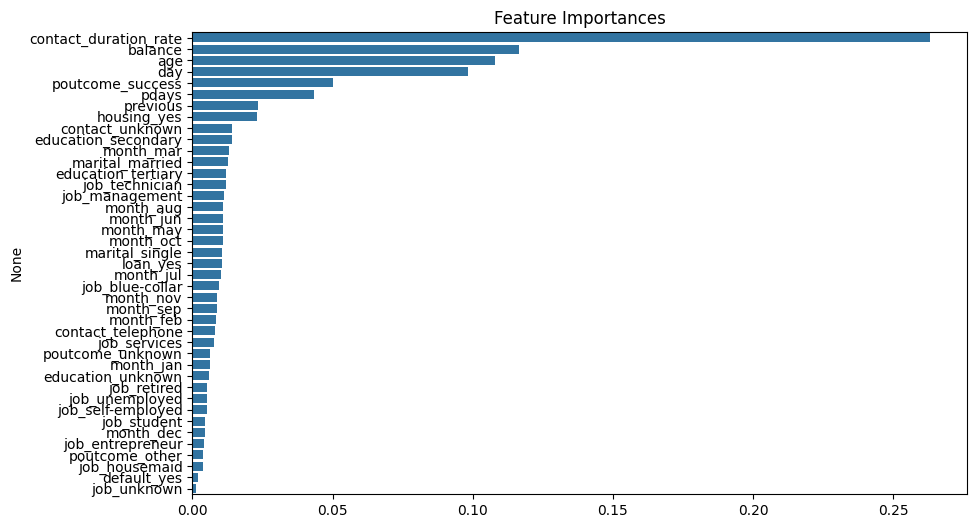

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Feature importance of Random Forest

importances = rf_clf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

#plot features importance

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y =features[indices])
plt.title('Feature Importances')
plt.show()